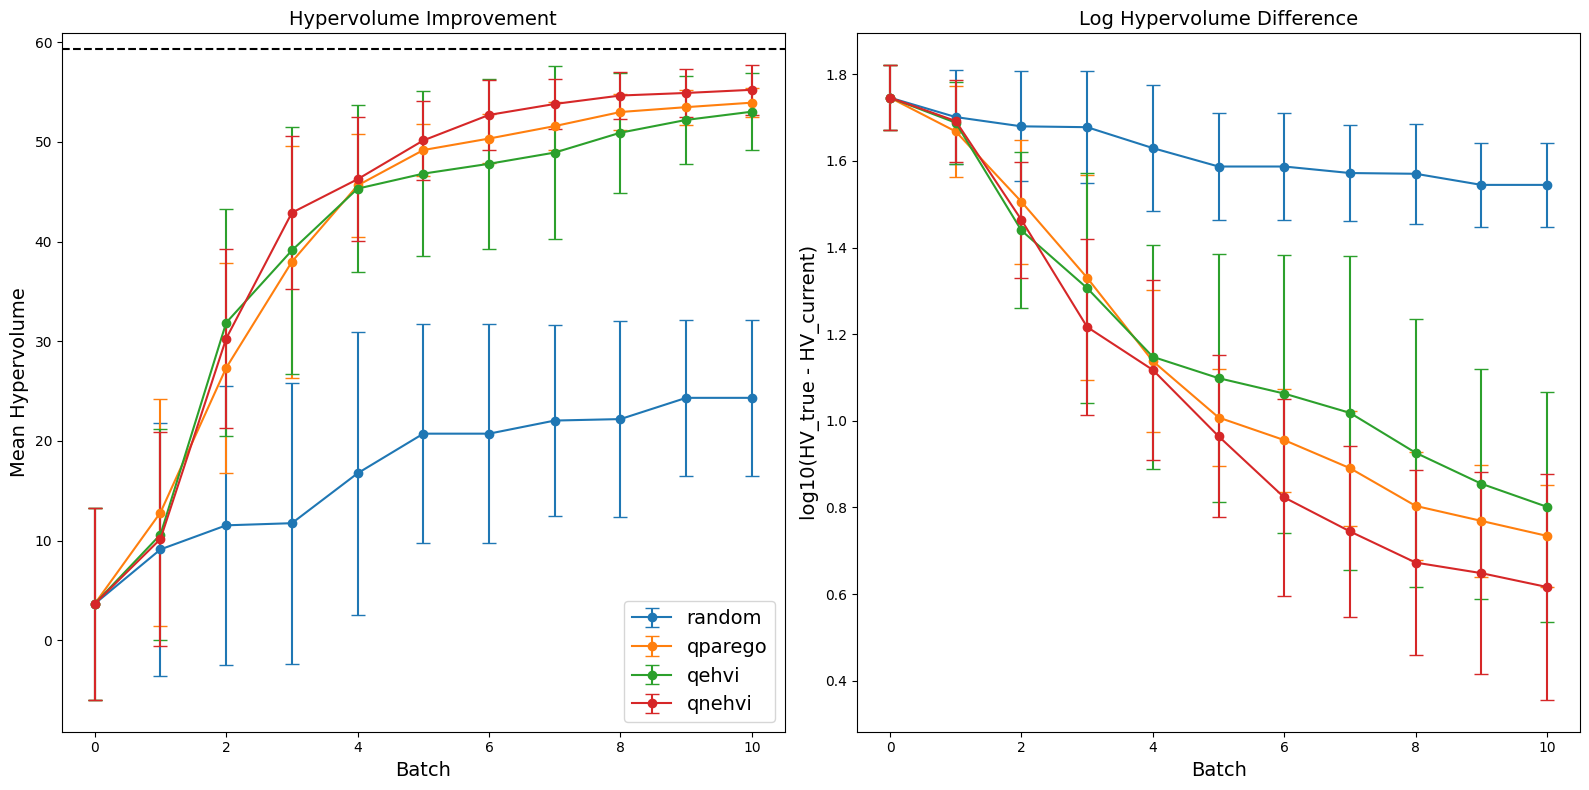

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
file_path = 'hypervolume_data.csv'
data = pd.read_csv(file_path)
hv_true = 59.36011874867746


stats = {}
methods = data['Method'].unique()


for method in methods:
    method_data = data[data['Method'] == method]
    mean_hypervolume = method_data['Mean Hypervolume'].values
    std_hypervolume = method_data['Std Hypervolume'].values
    stats[method] = (mean_hypervolume, std_hypervolume)


fig, axs = plt.subplots(1, 2, figsize=(16, 8))


for method in methods:
    method_data = data[data['Method'] == method]
    axs[0].errorbar(method_data['Batch'], method_data['Mean Hypervolume'], 
                    yerr=method_data['Std Hypervolume'], label=method, 
                    capsize=5, marker='o')

axs[0].set_xlabel('Batch', fontsize=14)
axs[0].set_ylabel('Mean Hypervolume', fontsize=14)
axs[0].set_title('Hypervolume Improvement', fontsize=14)
axs[0].legend(fontsize=14)
axs[0].axhline(y=59.36011874867746, color='black', linestyle='--', label='Max Hypervolume')



for key, (mean_hypervolume, std_hypervolume) in stats.items():
    x = np.arange(len(mean_hypervolume))
    mean_log_hv = np.log10(hv_true - mean_hypervolume)
    std_log_hv = std_hypervolume / ((hv_true - mean_hypervolume) * np.log(10))
        
    axs[1].errorbar(x, mean_log_hv, yerr=std_log_hv, label=key, marker='o', capsize=5)

axs[1].set_xlabel('Batch', fontsize=14)
axs[1].set_ylabel('log10(HV_true - HV_current)', fontsize=14)
axs[1].set_title('Log Hypervolume Difference', fontsize=14)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()